In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [2]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2016,1,1)
end = dt.datetime.now()

data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [3]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-04-24,39845.925781,39233.539062,39478.375000,39469.292969,17964398167,39469.292969
2022-04-25,40491.753906,38338.378906,39472.605469,40458.308594,35445730570,40458.308594
2022-04-26,40713.890625,37884.984375,40448.421875,38117.460938,34569088416,38117.460938
2022-04-27,39397.917969,37997.312500,38120.300781,39241.121094,30981015184,39241.121094
2022-04-28,40243.589844,38951.312500,39227.375000,39863.671875,33456252928,39863.671875


In [5]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [16]:
#look at past 60 days, and predict 1 day in the future.
prediction_days = 60

In [17]:
X_train, y_train = [], []
for x in range(prediction_days, len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x, 0]) #for each iteration, you get 60 day window (x-60 to x) as training data
    y_train.append(scaled_data[x, 0]) #for each iteration, the label is the last day of window, x
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train2 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
# Create Neural Network
# pip install numpy=1.19.5 may be needed?
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
71/71 [==============================] - 7s 45ms/step - loss: 0.0080
Epoch 2/25
71/71 [==============================] - 3s 45ms/step - loss: 0.0028
Epoch 3/25
71/71 [==============================] - 3s 45ms/step - loss: 0.0021
Epoch 4/25
71/71 [==============================] - 3s 45ms/step - loss: 0.0020
Epoch 5/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0021
Epoch 6/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0018
Epoch 7/25
71/71 [==============================] - 3s 45ms/step - loss: 0.0017
Epoch 8/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0018
Epoch 9/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0017
Epoch 10/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0016
Epoch 11/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0016
Epoch 12/25
71/71 [==============================] - 3s 46ms/step - loss: 0.0017
Epoch 13/25
71/71 [==================

In [9]:
y_train

array([6.60095209e-05, 1.29831576e-04, 1.50545066e-04, ...,
       5.61781653e-01, 5.78502165e-01, 5.87765970e-01])

In [10]:
test_start = dt.datetime(2020,1,1)
#test_start = dt.datetime(2020,1,1)+dt.timedelta(days=-prediction_days) #fix from comment section
test_end = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

In [11]:
model_inputs = total_dataset[len(total_dataset)-len(test_data) - prediction_days:].values #total length of dataset - test data - 60 days for predictions
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.fit_transform(model_inputs)

In [12]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
    X_test.append(model_inputs[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

prediction_prices = model.predict(X_test)
prediction_prices = scaler.inverse_transform(prediction_prices) #get actual values?


In [13]:
X_test.shape

(849, 30, 1)

In [14]:
prediction_prices

array([[38218.91  ],
       [35417.316 ],
       [30681.854 ],
       [25152.588 ],
       [19716.635 ],
       [14947.884 ],
       [11176.242 ],
       [ 8530.443 ],
       [ 6953.3486],
       [ 6259.434 ],
       [ 6228.945 ],
       [ 6615.3794],
       [ 7208.9707],
       [ 7839.3394],
       [ 8433.8955],
       [ 8933.417 ],
       [ 9297.895 ],
       [ 9529.764 ],
       [ 9643.026 ],
       [ 9643.767 ],
       [ 9552.055 ],
       [ 9403.203 ],
       [ 9224.105 ],
       [ 9021.755 ],
       [ 8815.303 ],
       [ 8617.934 ],
       [ 8456.107 ],
       [ 8357.906 ],
       [ 8352.354 ],
       [ 8421.412 ],
       [ 8547.348 ],
       [ 8708.95  ],
       [ 8856.505 ],
       [ 8972.58  ],
       [ 9048.627 ],
       [ 9079.834 ],
       [ 9100.16  ],
       [ 9131.093 ],
       [ 9179.944 ],
       [ 9245.678 ],
       [ 9334.64  ],
       [ 9421.792 ],
       [ 9514.126 ],
       [ 9614.9   ],
       [ 9709.265 ],
       [ 9793.785 ],
       [ 9837.7   ],
       [ 9839

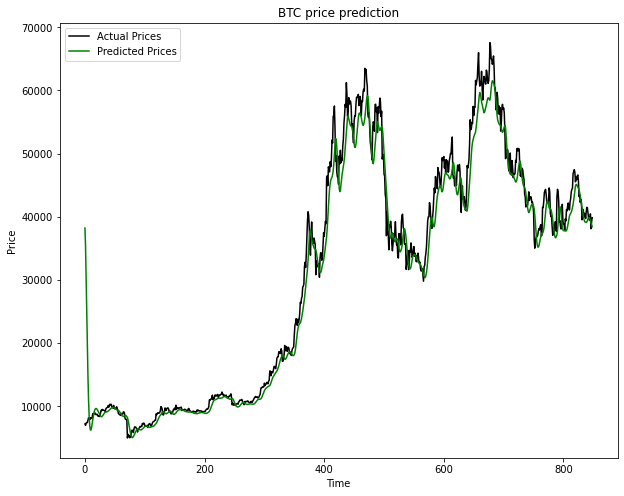

In [15]:
# plot it
plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(actual_prices, color='black', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} price prediction')
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend(loc='upper left')

plt.show()

In [14]:
model.evaluate(X_test, actual_prices)

27/27 [==============================] - 1s 10ms/step - loss: 1308912256.0000


1308912256.0

In [15]:
model.evaluate(X_test, actual_prices)

27/27 [==============================] - 0s 10ms/step - loss: 1308912256.0000


1308912256.0

In [16]:
len(scaled_data)

2310

In [17]:
scaled_data[60-prediction_days:60, 0]

array([1.04167292e-03, 1.02833968e-03, 9.77344526e-04, 1.02317641e-03,
       1.00634650e-03, 9.63863251e-04, 1.39454655e-03, 1.32285289e-03,
       1.23923965e-03, 1.24489427e-03, 1.25139718e-03, 1.06185055e-03,
       1.01246250e-03, 9.81734443e-04, 0.00000000e+00, 3.45299923e-04,
       2.67371279e-04, 3.39823765e-04, 2.35378056e-04, 8.31799706e-04,
       6.83471623e-04, 2.70243094e-04, 3.44630105e-04, 5.74978852e-04,
       4.07648833e-04, 4.14002793e-04, 4.55950188e-04, 2.37461530e-04,
       2.25333968e-04, 2.07194849e-04, 6.60095209e-05, 1.29831576e-04,
       1.50545066e-04, 8.35982547e-05, 3.75923538e-04, 3.30612976e-04,
       1.81407091e-04, 1.82865250e-04, 1.35649681e-04, 1.74070883e-04,
       2.57698656e-04, 2.28012331e-04, 2.96596223e-04, 4.09642392e-04,
       6.38354513e-04, 5.33521899e-04, 6.42193591e-04, 7.73646807e-04,
       8.63688027e-04, 8.40058218e-04, 1.08378425e-03, 1.10809886e-03,
       1.09247417e-03, 8.39328912e-04, 9.02109230e-04, 8.95993680e-04,
      

In [18]:
scaled_data[0:60, 0]

array([1.04167292e-03, 1.02833968e-03, 9.77344526e-04, 1.02317641e-03,
       1.00634650e-03, 9.63863251e-04, 1.39454655e-03, 1.32285289e-03,
       1.23923965e-03, 1.24489427e-03, 1.25139718e-03, 1.06185055e-03,
       1.01246250e-03, 9.81734443e-04, 0.00000000e+00, 3.45299923e-04,
       2.67371279e-04, 3.39823765e-04, 2.35378056e-04, 8.31799706e-04,
       6.83471623e-04, 2.70243094e-04, 3.44630105e-04, 5.74978852e-04,
       4.07648833e-04, 4.14002793e-04, 4.55950188e-04, 2.37461530e-04,
       2.25333968e-04, 2.07194849e-04, 6.60095209e-05, 1.29831576e-04,
       1.50545066e-04, 8.35982547e-05, 3.75923538e-04, 3.30612976e-04,
       1.81407091e-04, 1.82865250e-04, 1.35649681e-04, 1.74070883e-04,
       2.57698656e-04, 2.28012331e-04, 2.96596223e-04, 4.09642392e-04,
       6.38354513e-04, 5.33521899e-04, 6.42193591e-04, 7.73646807e-04,
       8.63688027e-04, 8.40058218e-04, 1.08378425e-03, 1.10809886e-03,
       1.09247417e-03, 8.39328912e-04, 9.02109230e-04, 8.95993680e-04,
      